In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

# Load Dataset

In [2]:
start = time.process_time()

listings_data = pd.read_csv("listings.csv", index_col='listing_id')
reviews_data = pd.read_csv("reviews.csv", index_col='listing_id')

#Combine data
combined = reviews_data.join(listings_data, how='inner')
combined.reset_index(inplace=True)

end = time.process_time()

print ("Computation time = " + str(1000*(end - start)) + "ms")

Computation time = 2484.375ms


In [3]:
print("Number of records in combined dataset: "+str(combined.shape[0]))
combined.info()

Number of records in combined dataset: 84849
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 97 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        84849 non-null  int64  
 1   id                                84849 non-null  int64  
 2   date                              84849 non-null  object 
 3   reviewer_id                       84849 non-null  int64  
 4   reviewer_name                     84849 non-null  object 
 5   comments                          84831 non-null  object 
 6   listing_url                       84849 non-null  object 
 7   scrape_id                         84849 non-null  float64
 8   last_scraped                      84849 non-null  object 
 9   name                              84849 non-null  object 
 10  summary                           75850 non-null  object 
 11  space                 

# Exploratory Data Analaysis

In [4]:
combined

,listing_id,id,date,reviewer_id,reviewer_name,comments,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,4291,5473484,7/1/2013,4142203,Azita,"We had a great stay in Seattle, great location...",https://www.airbnb.com/rooms/4291,2.016010e+13,1/4/2016,Sunrise in Seattle Master Suite,NaN,"Located in Seattle, this is a spacious, clean...","Located in Seattle, this is a spacious, clean...",none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/19407574/6...,https://a2.muscache.com/im/pictures/19407574/6...,https://a2.muscache.com/ac/pictures/19407574/6...,https://a2.muscache.com/ac/pictures/19407574/6...,35749,https://www.airbnb.com/users/show/35749,Jess & Joey,9/2/2009,"Seattle, Washington, United States",We are a young Seattle couple who have been re...,within a day,100%,100%,f,https://a2.muscache.com/ac/pictures/769c80c5-f...,https://a2.muscache.com/ac/pictures/769c80c5-f...,Roosevelt,6.0,6.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"15th Ave Ne, Seattle, WA 98115, United States",Roosevelt,Roosevelt,Other neighborhoods,Seattle,WA,98115,Seattle,"Seattle, WA",US,United States,47.687251,-122.313130,f,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""F...",NaN,$82.00,$525.00,"$1,925.00",NaN,$30.00,1,$0.00,2,60,3 months ago,t,30,60,90,365,1/4/2016,35,7/1/2013,10/18/2015,92.0,10.0,9.0,10.0,9.0,9.0,9.0,f,NaN,WASHINGTON,f,moderate,f,f,5,1.14
1,4291,5630770,7/8/2013,7306147,Bryant,Greatly enjoyed our quick stay here. We booked...,https://www.airbnb.com/rooms/4291,2.016010e+13,1/4/2016,Sunrise in Seattle Master Suite,NaN,"Located in Seattle, this is a spacious, clean...","Located in Seattle, this is a spacious, clean...",none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/19407574/6...,https://a2.muscache.com/im/pictures/19407574/6...,https://a2.muscache.com/ac/pictures/19407574/6...,https://a2.muscache.com/ac/pictures/19407574/6...,35749,https://www.airbnb.com/users/show/35749,Jess & Joey,9/2/2009,"Seattle, Washington, United States",We are a young Seattle couple who have been re...,within a day,100%,100%,f,https://a2.muscache.com/ac/pictures/769c80c5-f...,https://a2.muscache.com/ac/pictures/769c80c5-f...,Roosevelt,6.0,6.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"15th Ave Ne, Seattle, WA 98115, United States",Roosevelt,Roosevelt,Other neighborhoods,Seattle,WA,98115,Seattle,"Seattle, WA",US,United States,47.687251,-122.313130,f,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""F...",NaN,$82.00,$525.00,"$1,925.00",NaN,$30.00,1,$0.00,2,60,3 months ago,t,30,60,90,365,1/4/2016,35,7/1/2013,10/18/2015,92.0,10.0,9.0,10.0,9.0

In [5]:
# Lets find out the unique users and listings
print('Total number of unique llistings: '+str(combined['listing_id'].nunique()))
print('Total number of unique users: '+str(combined['reviewer_id'].nunique()))

Total number of unique llistings: 3191
Total number of unique users: 75730


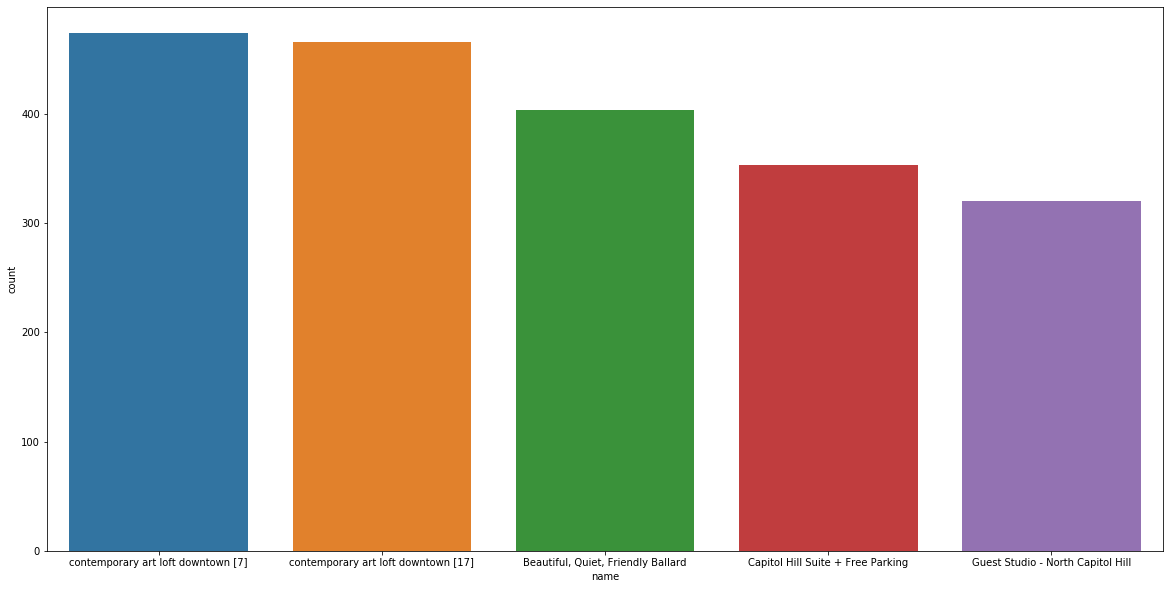

In [6]:
#top 5 propoerty booked by users
df = pd.DataFrame(combined.groupby('listing_id')['name'].value_counts().nlargest(5)).rename(columns={'name':'count'}).\
    reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='name',y='count',data=df)

In [7]:
#Format price and remove dollar from the dataset
combined['price'] = combined['price'].str.replace(',','').str.replace(' ','').str.replace('$','').astype(float)
combined['cleaning_fee'] = combined['cleaning_fee'].str.replace(',','').str.replace(' ','').str.replace('$','').astype(float)
combined['weekly_price'] = combined['weekly_price'].str.replace(',','').str.replace(' ','').str.replace('$','').astype(float)
combined['monthly_price'] = combined['monthly_price'].str.replace(',','').str.replace(' ','').str.replace('$','').astype(float)
combined['extra_people'] = combined['extra_people'].str.replace(',','').str.replace(' ','').str.replace('$','').astype(float)
combined['security_deposit'] = combined['security_deposit'].str.replace(',','').str.replace(' ','').str.replace('$','').astype(float)

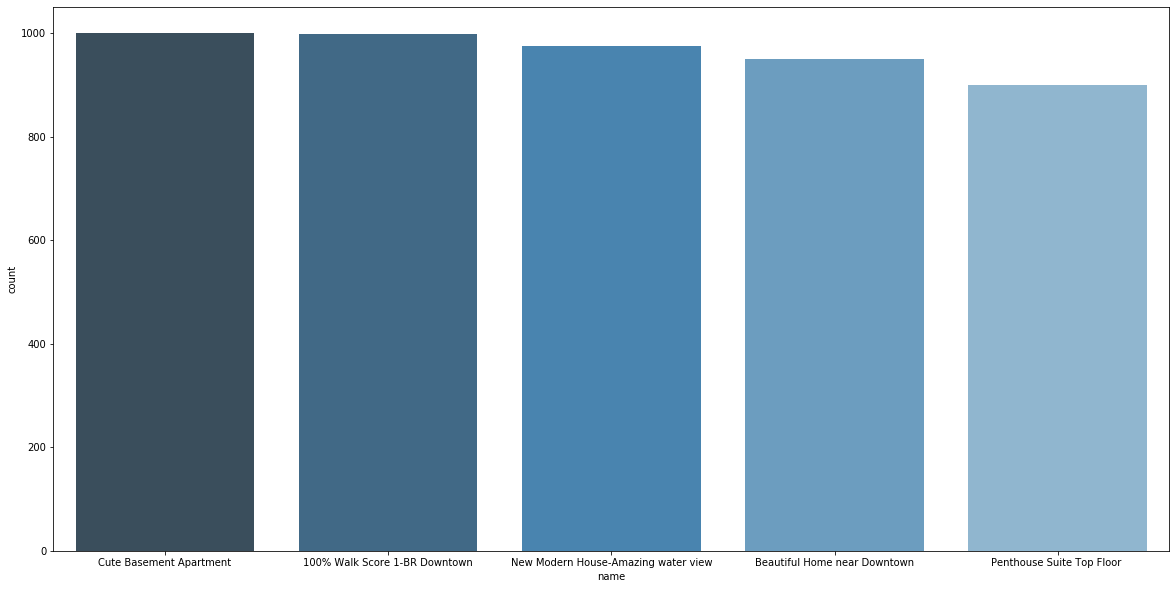

In [8]:
#top 5 expensive propoeries booked by users
df = pd.DataFrame(combined.groupby(['listing_id','name']).mean()['price'].nlargest(5)).rename(columns={'price':'count'}).\
    reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='name',y='count',data=df, palette='Blues_d')

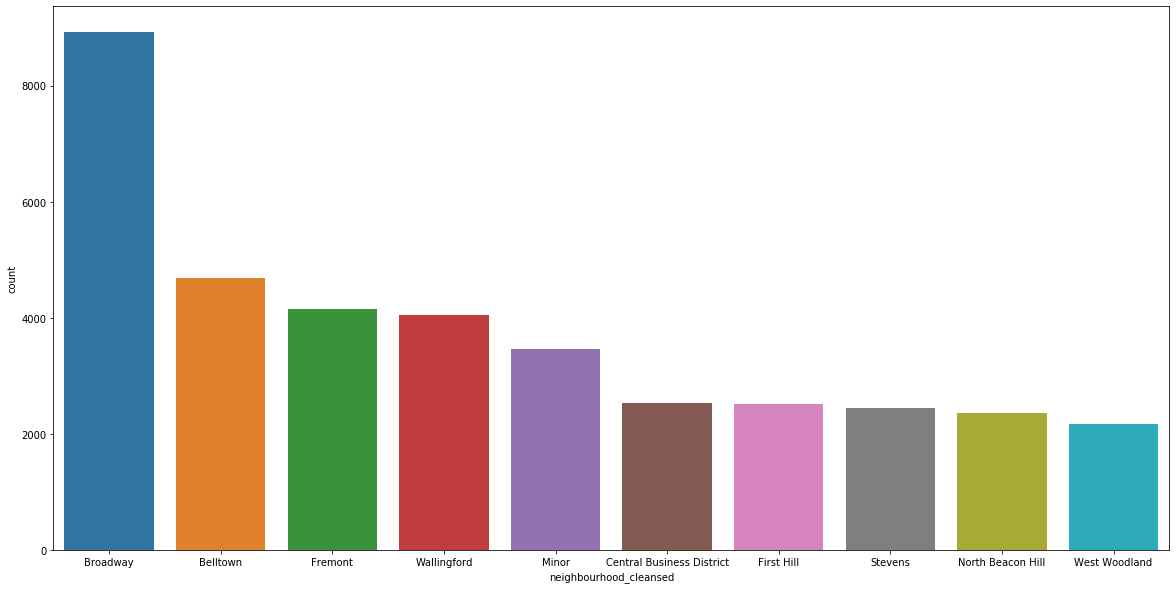

In [9]:
#Top 10 popular neighbourhoods booked by the users
df = pd.DataFrame(combined.groupby('neighbourhood_cleansed').count()['listing_id'].nlargest(10)).\
    rename(columns={'listing_id':'count'}).reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='neighbourhood_cleansed',y='count',data=df)

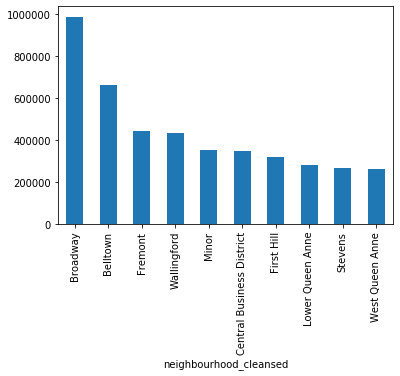

In [10]:
#Top 10 revenue generating neighbourhoods
combined.groupby('neighbourhood_cleansed').sum()['price'].nlargest(10).plot(kind='bar')

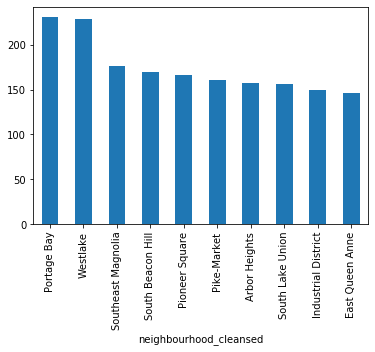

In [11]:
# Top 10 expensive neighbourhoods booked by users in Seattle
combined.groupby('neighbourhood_cleansed').mean()['price'].nlargest(10).plot(kind='bar')

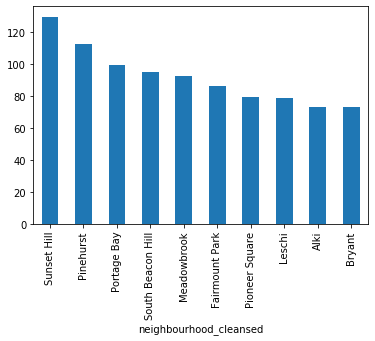

In [12]:
# Top 10 neighbourhoods booked by users with highest clening fees in Seattle
combined.groupby('neighbourhood_cleansed').mean()['cleaning_fee'].nlargest(10).plot(kind='bar')

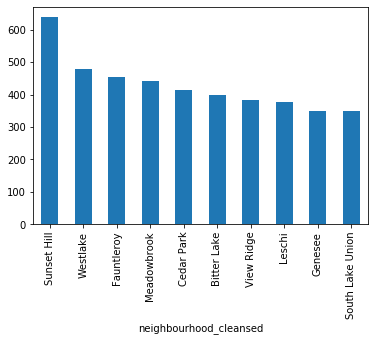

In [13]:
# Top 10 neighbourhoods booked by users with highest security fees in Seattle
combined.groupby('neighbourhood_cleansed').mean()['security_deposit'].nlargest(10).plot(kind='bar')

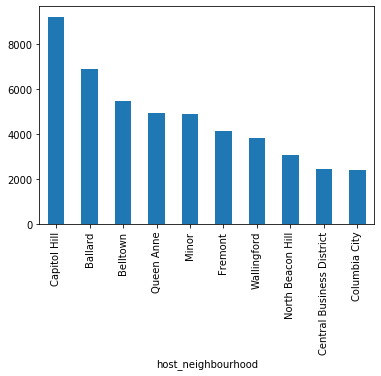

In [14]:
#Top 10 popular host neighbourhoods booked by the users
combined.groupby('host_neighbourhood').count()['listing_id'].nlargest(10).plot(kind='bar')

In [15]:
#Top 10 popular propoerty type booked by the users
combined.groupby('property_type').count()['listing_id'].nlargest(10)

property_type
House              40495
Apartment          36232
Cabin               1944
Loft                1812
Townhouse           1119
Bed & Breakfast      894
Condominium          734
Other                719
Camper/RV            638
Bungalow              74
Name: listing_id, dtype: int64

In [16]:
#Top 10 expensive propoerty type booked by the users and their avg price per day
combined.groupby('property_type').mean()['price'].nlargest(10)

property_type
Boat           276.343284
Condominium    131.700272
Chalet         128.916667
Apartment      115.842819
Townhouse      115.604111
Loft           109.694812
House          104.280084
Bungalow       103.121622
Yurt           100.000000
Treehouse       98.666667
Name: price, dtype: float64

In [17]:
#Top 10 popular room type booked by the users
combined.groupby('room_type').count()['listing_id'].nlargest(10)

room_type
Entire home/apt    52465
Private room       30870
Shared room         1514
Name: listing_id, dtype: int64

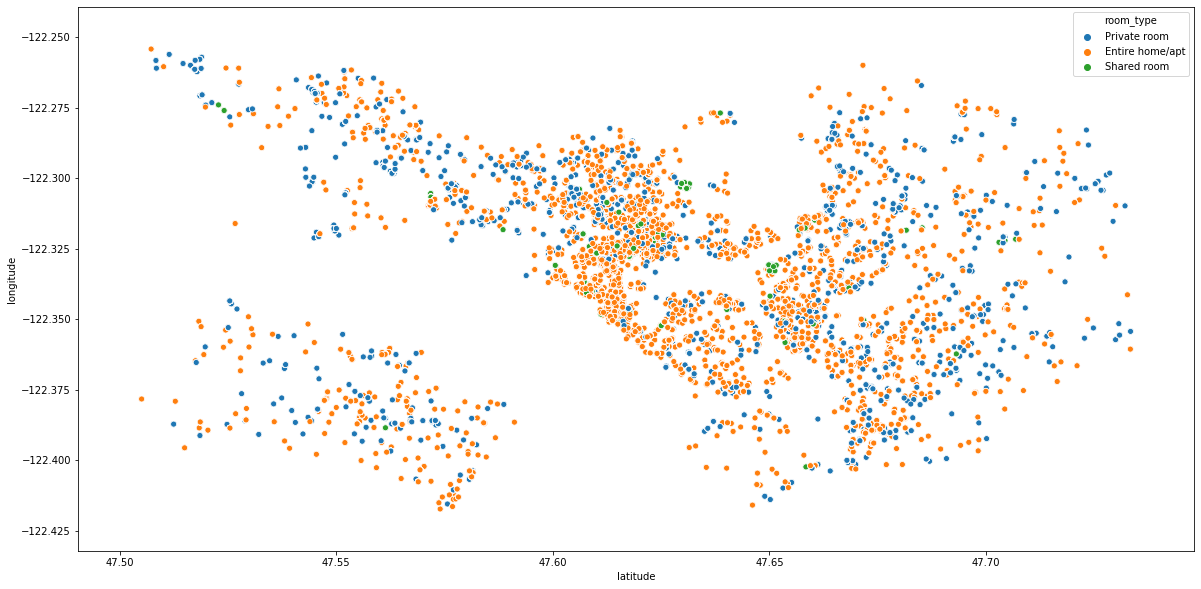

In [18]:
#Pattern on booking different room types in seattle
plt.figure(figsize=(20,10))
sns.scatterplot(data=combined, x="latitude", y="longitude", hue="room_type")

In [19]:
#Top 10 expensive room type booked by the users and their avg. price per day
combined.groupby('room_type').mean()['price'].nlargest(10)

room_type
Entire home/apt    132.286324
Private room        72.127081
Shared room         46.856671
Name: price, dtype: float64

In [20]:
# Popular accomodation size booked by the users
combined.groupby('accommodates').count()['listing_id'].sort_values(ascending=False)

accommodates
2     42821
4     16041
3     10170
6      5580
1      3542
5      3221
8      1501
7       956
10      520
12      229
9        98
14       83
16       48
11       20
15       19
Name: listing_id, dtype: int64

In [21]:
#Accomodation size and their average cost per day
combined.groupby('accommodates').mean()['price'].sort_values(ascending=True)

accommodates
1      52.234331
2      85.563112
3     104.200983
4     125.280656
5     145.571562
7     163.099372
6     170.868100
15    172.000000
12    251.790393
8     264.818121
10    303.807692
14    398.361446
9     480.816327
16    527.208333
11    975.000000
Name: price, dtype: float64

In [22]:
# Bathrooms in proporty booked by the users
combined.groupby('bathrooms').count()['listing_id'].sort_values(ascending=False)

bathrooms
1.0    69850
1.5     5678
2.0     4905
2.5     1497
3.0     1179
3.5      570
0.5      366
4.5       58
4.0       56
0.0       46
5.0       27
8.0        8
Name: listing_id, dtype: int64

In [23]:
# Propoerty price per day and number of Bathrooms booked by the users
combined.groupby('bathrooms').mean()['price'].sort_values(ascending=True)

bathrooms
0.0     51.021739
0.5     71.538251
8.0     77.250000
1.0     99.868447
1.5    102.266643
5.0    133.888889
2.0    166.491743
3.0    197.030534
3.5    226.561404
2.5    238.756179
4.5    485.000000
4.0    493.892857
Name: price, dtype: float64

In [24]:
# Bedrooms in proporty booked by the users
combined.groupby('bedrooms').count()['listing_id'].sort_values(ascending=False)

bedrooms
1.0    61399
2.0    10593
0.0     8113
3.0     3593
4.0      569
5.0      205
6.0       82
7.0        5
Name: listing_id, dtype: int64

In [25]:
# Propoerty price per day and number of bedrooms booked by the users
combined.groupby('bedrooms').mean()['price'].sort_values(ascending=True)

bedrooms
1.0     90.563478
0.0    103.679034
2.0    156.582460
3.0    236.509045
4.0    280.326889
7.0    375.000000
5.0    459.165854
6.0    576.048780
Name: price, dtype: float64

In [26]:
# Bed types in proporty booked by the users
combined.groupby('bed_type').count()['listing_id'].sort_values(ascending=False)

bed_type
Real Bed         81625
Futon             1714
Pull-out Sofa     1064
Airbed             383
Couch               63
Name: listing_id, dtype: int64

In [27]:
# Majority of the host gave response in few hours
combined.groupby('host_response_time').count()['listing_id'].sort_values(ascending=False)

host_response_time
within an hour        48870
within a few hours    24050
within a day           7847
a few days or more      443
Name: listing_id, dtype: int64

# Collaborative Filtering
- User-User Filtering
- Item-Item Filtering

In [61]:
from surprise import KNNBasic
from surprise import accuracy
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [49]:
#Calculate number of bookings 
data = pd.DataFrame(combined.groupby(['reviewer_id','listing_id']).count()['id']).rename(columns={'id':'count'}).reset_index()
data.describe()

,reviewer_id,listing_id,count
count,8.353600e+04,8.353600e+04,83536.000000
mean,1.708501e+07,3.013726e+06,1.015718
std,1.355071e+07,2.474688e+06,0.160890
min,1.500000e+01,4.291000e+03,1.000000
25%,5.091846e+06,7.973580e+05,1.000000
50%,1.425023e+07,2.500188e+06,1.000000
75%,2.774962e+07,4.707171e+06,1.000000
max,5.281274e+07,1.024814e+07,11.000000


In [84]:
#preparing the data
reader = Reader(rating_scale=(1,11))
s_data = Dataset.load_from_df(data[['reviewer_id','listing_id','count']], reader)
trainset, testset = train_test_split(s_data, test_size=.50)

In [94]:
#Doing user-user collaborative filtering using Cosine Similarity
sim_options = {'name':'cosine', 'user_based':True}
algo = KNNBasic(sim_options=sim_options)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.1707


0.17070887010981822

In [64]:
#Doing item-item collaborative filtering using Cosine Similarity
sim_options = {'name':'cosine', 'user_based':False}
algo = KNNBasic(sim_options=sim_options)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.1677


0.16774496018231938

# Matrix Factorization 
- NMF 
- SVD

In [69]:
#Doing matrix factorization using NMF
from surprise import NMF
from surprise import SVD

n = 30
table=[]
for i in range(1,n+1,2):
    algo = NMF(n_factors=i)

    # Train the algorithm on the trainset, and predict ratings for the testset
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Then compute RMSE
    rmse = accuracy.rmse(predictions)
    table.append([i,rmse])
#    print(i,rmse)
final_df = pd.DataFrame(table, columns=['N-Components','RMSE'])
final_df.sort_values(by = 'RMSE',ascending=True)

RMSE: 0.1777
RMSE: 0.1733
RMSE: 0.1719
RMSE: 0.1724
RMSE: 0.1705
RMSE: 0.1711
RMSE: 0.1701
RMSE: 0.1708
RMSE: 0.1720
RMSE: 0.1705
RMSE: 0.1709
RMSE: 0.1703
RMSE: 0.1716
RMSE: 0.1709
RMSE: 0.1702


,N-Components,RMSE
6,13,0.170071
14,29,0.170230
11,23,0.170347
9,19,0.170462
4,9,0.170535
7,15,0.170841
13,27,0.170865
10,21,0.170879
5,11,0.171069
12,25,0.171557


In [72]:
#Doing matrix factorization using SVD
n = 30
table=[]
for i in range(1,n+1,2):
    algo = SVD(n_factors=i)

    # Train the algorithm on the trainset, and predict ratings for the testset
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Then compute RMSE
    rmse = accuracy.rmse(predictions)
    table.append([i,rmse])
#    print(i,rmse)
final_df = pd.DataFrame(table, columns=['N-Components','RMSE'])
final_df.sort_values(by = 'RMSE',ascending=True)

RMSE: 0.1640
RMSE: 0.1639
RMSE: 0.1639
RMSE: 0.1639
RMSE: 0.1640
RMSE: 0.1641
RMSE: 0.1641
RMSE: 0.1642
RMSE: 0.1640
RMSE: 0.1642
RMSE: 0.1640
RMSE: 0.1641
RMSE: 0.1642
RMSE: 0.1644
RMSE: 0.1643


,N-Components,RMSE
1,3,0.163936
2,5,0.163936
3,7,0.163938
4,9,0.163956
0,1,0.163990
8,17,0.164018
10,21,0.164029
5,11,0.164060
11,23,0.164117
6,13,0.164148
